# Homework #5  (Due date: 2nd of November, 23:59)

- Use California Housing Dataset from sklearn.datasets.
- Use only 3 columns (Latitude, Longitude and Target) and run k-means algorithm. Determine/choose the optimum "k" value using the elbow method. Show your plot (error vs. k)
- Scatter your data in a 2D plot where x and y axes will be Latitude and Longitude. Coloring of samples should denote the determined cluster (according to your optimum k). I.e. we should be able to distinguish the samples of k categories/clusters.





In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import v_measure_score, completeness_score, homogeneity_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import fetch_california_housing


In [63]:
#Load the California Housing dataset
housing = fetch_california_housing()
data = pd.DataFrame(data=np.c_[housing['data'], housing['target']],
                    columns=housing['feature_names'] + ['Target'])

In [64]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [65]:
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Just three features are used. Target, Latitude, Longitude

In [66]:
#Select the columns for clustering (Latitude, Longitude, Target)
X = data[['Latitude', 'Longitude', 'Target']]

In [67]:
X

,Latitude,Longitude,Target
0,37.88,-122.23,4.526
1,37.86,-122.22,3.585
2,37.85,-122.24,3.521
3,37.85,-122.25,3.413
4,37.85,-122.25,3.422
...,...,...,...
20635,39.48,-121.09,0.781
20636,39.49,-121.21,0.771
20637,39.43,-121.22,0.923
20638,39.43,-121.32,0.847


In [68]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
#Determine the optimal "k" value using the elbow method
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    scores.append(kmeans.inertia_)

/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

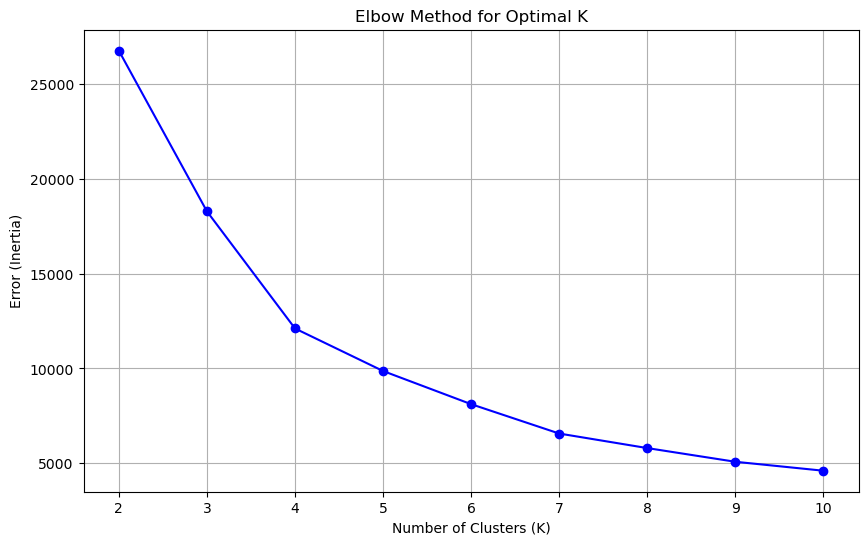

In [70]:
#Plot the elbow method to find the optimal "k"
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Error (Inertia)')
plt.grid()
plt.show()

In [71]:
#Assuming the optimal k value is 5
optimal_k = 5


In [72]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


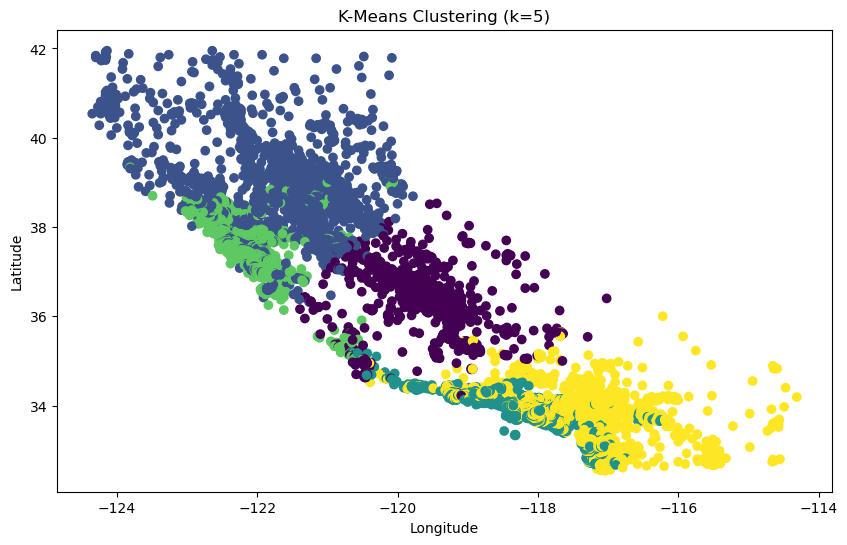

In [73]:
#Scatter the data in a 2D plot with cluster coloring
plt.figure(figsize=(10, 6))
plt.scatter(X['Longitude'], X['Latitude'], c=y_kmeans, cmap='viridis')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Example: Clustering Synthetic Datasets with K-Means

/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/akshayreddy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

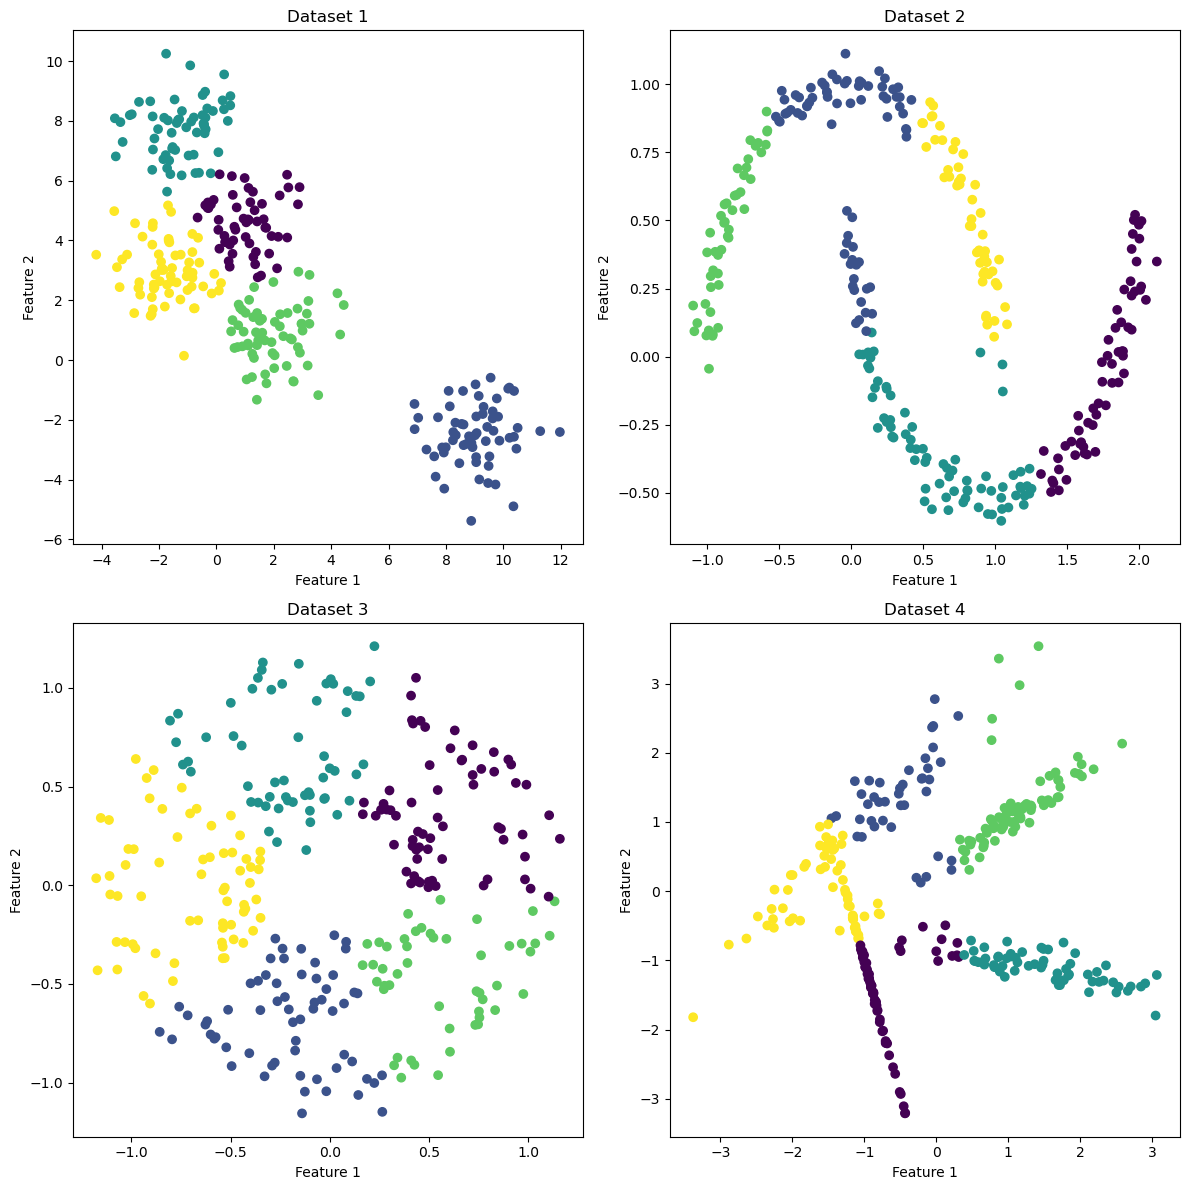

In [74]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification

#Create synthetic datasets
blobs = make_blobs(n_samples=300, centers=5, random_state=0, cluster_std=1.0)
moons = make_moons(n_samples=300, noise=0.05, random_state=0)
circles = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)
classification = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=0)

datasets = [blobs, moons, circles, classification]

#Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for i, (X, y) in enumerate(datasets):
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)plot_2d_examples(KMeans(n_clusters=5))
    
    #Select the subplot
    ax = axes[i // 2, i % 2]
    
    #Scatter plot with K-Means cluster coloring
    ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
    
    #Set subplot title and axis labels
    ax.set_title(f'Dataset {i + 1}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

#Adjust subplot layout
plt.tight_layout()

#Show the plots
plt.show()
